In [54]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df['label'].nunique()

22

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

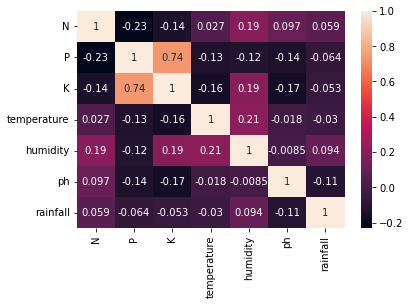

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
categorical_feature=[i for i in df.columns if df[i].dtypes=='O']
numerical_feature=[i for i in df.columns if df[i].dtypes!='O']

print(f'There are {len(categorical_feature)} in the dataset')
print(categorical_feature)
print()
print(f'There are {len(numerical_feature)} in the dataset')
print(numerical_feature)

There are 1 in the dataset
['label']

There are 7 in the dataset
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [9]:
for i in categorical_feature:
    unique=df[i].unique()
    print(f'{i} have {len(unique)} unique values')

label have 22 unique values


In [10]:
categorical_feature=[i for i in df.columns if df[i].dtypes=='O']

df[categorical_feature].isnull().sum()

label    0
dtype: int64

In [11]:
numerical_feature=[i for i in df.columns if df[i].dtypes!='O']

df[numerical_feature].isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


<AxesSubplot:>

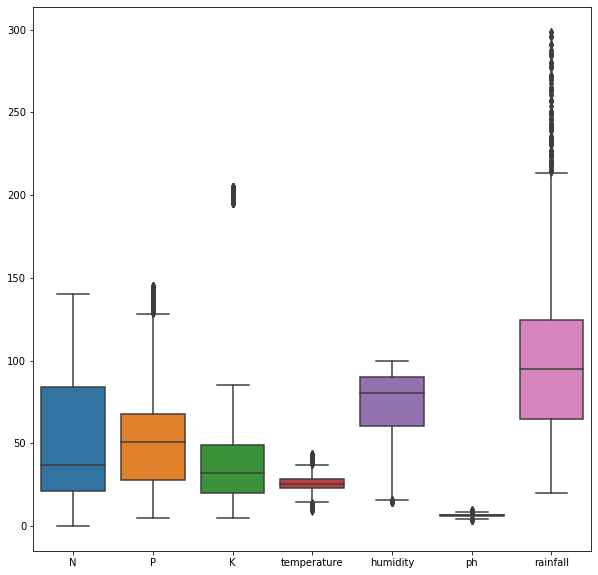

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [35]:
num_cols=df.columns[:-1]

In [37]:
num_int=[i for i in num_cols if df[i].dtypes=='int64']
num_float=[i for i in num_cols if df[i.dtypes=='float64']]

AttributeError: 'str' object has no attribute 'dtypes'

In [14]:
#Fixing the outliers
for i in numerical_feature:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-(IQR*1.5)
    higer_limit=q3+(IQR*1.5)
    df.loc[df[i]<lower_limit,i]=lower_limit
    df.loc[df[i]>higer_limit,i]=higer_limit

<AxesSubplot:>

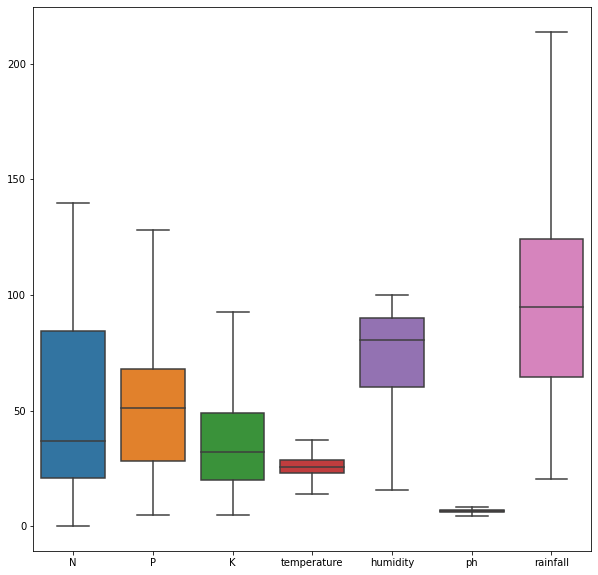

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [16]:
label_vals=df['label'].unique()

for i in range(len(label_vals)):
#     print(i,label_vals[i])
    df['label'].replace({label_vals[i]:i},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2200 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 137.6 KB


In [18]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507,21
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610,21
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839,21
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293,21
2199,104.0,18,30.0,23.603016,60.396475,6.779833,140.937041,21


<AxesSubplot:xlabel='label', ylabel='count'>

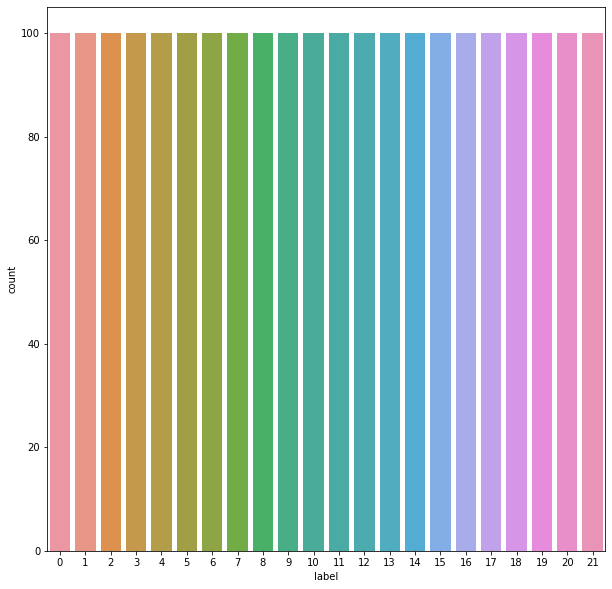

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['label'])

In [20]:
x=df.drop('label',axis=1)
y=df['label']

In [21]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58,41.0,21.770462,80.319644,7.038096,213.841241
2,60.0,55,44.0,23.004459,82.320763,7.840207,213.841241
3,74.0,35,40.0,26.491096,80.158363,6.980401,213.841241
4,78.0,42,42.0,20.130175,81.604873,7.628473,213.841241
...,...,...,...,...,...,...,...
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293


In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [26]:
#feature selection:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [27]:
len(x_train.columns)

7

In [28]:
best_value=SelectKBest(f_classif,k=5)
x_best=best_value.fit_transform(x_train,y_train)

In [29]:
x_best[0]

array([ 30.        ,  63.        ,  16.        ,  21.90539577,
       100.5978728 ])

In [30]:
li=[]
n=20
for i in x_best[n]:
    for j in x_train.columns:
        if i==x_train[j].iloc[n]:
            li.append(j)
            print(f"'{j}',")
print(f'len of list is:{len(li)}')

'N',
'P',
'K',
'humidity',
'rainfall',
len of list is:5


In [32]:
selected_feature=['N',
'P',
'K',
'humidity',
'rainfall']

In [49]:
final_x_train=x_train[selected_feature]
final_x_train

,N,P,K,humidity,rainfall
396,30.0,63,16.0,21.905396,100.597873
1131,33.0,29,34.0,49.217291,92.997394
409,38.0,61,21.0,67.386808,127.776713
42,83.0,60,36.0,80.145093,200.834898
1763,70.0,65,52.0,93.126598,75.952950
...,...,...,...,...,...
720,58.0,71,15.0,67.586188,74.012297
547,10.0,44,24.0,43.021514,58.276007
1099,117.0,81,53.0,78.205856,98.125658
879,35.0,74,22.0,62.968418,42.872749


In [67]:
final_x_test=x_test[selected_feature]
final_x_test

,N,P,K,humidity,rainfall
805,29.0,71,18.0,62.138738,53.466226
1391,100.0,10,53.0,84.608083,42.006603
747,55.0,67,16.0,69.693664,70.271847
2112,99.0,15,27.0,57.279275,165.687212
1942,103.0,42,17.0,84.615276,81.059023
...,...,...,...,...,...
61,83.0,58,45.0,83.518271,213.841241
458,16.0,77,22.0,35.639561,100.546816
784,27.0,62,24.0,66.770943,62.273735
600,19.0,55,20.0,87.805077,54.733676


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
num_folds = 4
scoring = 'accuracy'
pipelines = []
pipelines.append(('RandomF',Pipeline([('Scalar',StandardScaler()),('RandomF', RandomForestClassifier())])))
pipelines.append(('Adaboost',Pipeline([('Scalar',StandardScaler()),('Adaboost', AdaBoostClassifier())])))
pipelines.append(('SVC',Pipeline([('Scalar',StandardScaler()),('SVC',SVC())])))
pipelines.append(('KNN',Pipeline([('Scaled',StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 final_x_train,
                                 y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    print(f'{name} is giving accuracy of {cv_results.mean()}, with standard deviation of: {cv_results.std()}')


RandomF is giving accuracy of 0.9902597402597403, with standard deviation of: 0.00425807696383247
Adaboost is giving accuracy of 0.1435064935064935, with standard deviation of: 0.04197739313998438
SVC is giving accuracy of 0.9831168831168831, with standard deviation of: 0.002903984386363364
KNN is giving accuracy of 0.9818181818181818, with standard deviation of: 0.004106854104114779


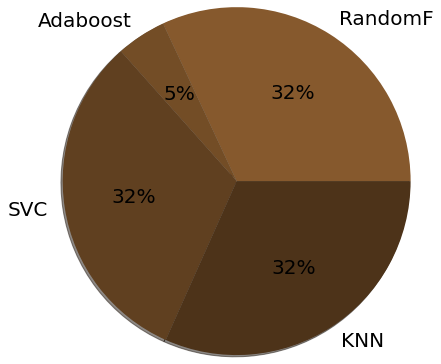

In [52]:
result_df=pd.DataFrame({'Result':results,'Name':names})
color_li=['#86592d','#734d26','#604020','#4d3319','#392613','#261a0d']
plt.pie(data=result_df,x='Result',radius=2,colors=color_li,shadow=True,labels='Name',textprops={'fontsize':20},autopct='%.0f%%');

In [60]:
model_RandomForest = Pipeline([('Scalar',StandardScaler()),('RF', RandomForestClassifier())])
tuned_parameters ={
    'RF__n_estimators':[100,80,110],
    'RF__criterion':['gini','entropy'],
    'RF__max_features':['sqrt','log2',None]
}
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model_RandomForest,
                    param_grid=tuned_parameters,
                    scoring=scoring,
                    cv=kfold)
grid_result = grid.fit(final_x_train, y_train)
print(f'{grid_result.best_score_},{grid_result.best_params_}')

0.9922077922077922,{'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 110}


In [59]:
model_KNN = Pipeline([('Scaled',StandardScaler()),('KNN', KNeighborsClassifier())])
tuned_parameters = {
    'KNN__n_neighbors':[5,10,25,40],
    
    'KNN__weights':['uniform', 'distance'],
    'KNN__p':[1,2]
    }
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model_KNN,
                    param_grid=tuned_parameters,
                    scoring=scoring,
                    cv=kfold)
grid_result = grid.fit(final_x_train, y_train)
print(f'{grid_result.best_score_},{grid_result.best_params_}')

0.9818181818181818,{'KNN__n_neighbors': 5, 'KNN__p': 2, 'KNN__weights': 'uniform'}


In [61]:
model_final = Pipeline([('Scaled',StandardScaler()),
                        ('KNN', KNeighborsClassifier(n_neighbors= 5, 
                                                    p= 1, 
                                                    weights= 'distance'))])


In [62]:
model_final.fit(final_x_train,y_train)

Pipeline(steps=[('Scaled', StandardScaler()),
                ('KNN', KNeighborsClassifier(p=1, weights='distance'))])

In [68]:
y_pred=model_final.predict(final_x_test)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       1.00      0.97      0.98        30
           2       1.00      1.00      1.00        30
           3       0.94      1.00      0.97        30
           4       1.00      0.93      0.97        30
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.98        30
           8       0.97      1.00      0.98        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9863636363636363